In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime, timedelta

In [8]:
def generate_dataframe():
    df = pd.read_csv("final_dataset.csv")
    df = df.loc[df['Violation Precinct'] < 124]
    
    violation_precincts = df["Violation Precinct"].unique()
    
    print(len(violation_precincts))
    
    final_df = None
    
    i = 0
    
    for precinct in violation_precincts:
        
        new_dataset = read_data(precinct, i)
        new_dataset[precinct] = new_dataset["prediction"]
        new_dataset = new_dataset[precinct]
        print("dataset", i, "read")
        
        if i == 0:
            final_df = new_dataset
        else:
            final_df = pd.merge(final_df, new_dataset, how = 'left', left_index=True, right_index=True)
        
        print("dataset", i, "merged")
        
        i += 1
            
    return final_df

In [9]:
def read_data(precinct, i):
    df = pd.read_csv("final_dataset.csv")
    dataset = df.loc[df['Violation Precinct'] == precinct]
    dataset = dataset[(dataset['year'] < 2017)]
    dataset["Issue Date"] = pd.to_datetime(dataset["Issue Date"])

    dataset = dataset.set_index('Issue Date')
    features = ['month', 'day', 'dayofweek', 'year']
    target = ['count']

    new_test = anomaly_prediction(dataset[features], dataset[target], dataset.iloc[-1].name, 365, features, i)
    new_test = new_test.set_index('Date')
    
    return new_test

In [10]:
def train_and_predict(X_train, y_train, X_test, output_df, i, lr = 0.01, n_estimators = 1000):
    reg = GradientBoostingRegressor(learning_rate = lr, n_estimators = n_estimators, min_samples_split = 10, min_samples_leaf = 10)
    reg.fit(X_train, y_train.values.ravel())
    output_df['prediction'] = reg.predict(X_test)
    
    print("dataset", i, "trained")
    return output_df, reg

In [11]:
def anomaly_prediction(X_train, y_train, current_day, num_days, features, i):
    date_range = pd.date_range(current_day - timedelta(days = 10), current_day + timedelta(days=num_days))
    new_test = date_range.to_frame(index = False, name = "Date")
    
    new_test['dayofweek'] = new_test.Date.dt.dayofweek
    new_test['day'] = new_test.Date.dt.dayofyear
    new_test['month'] = new_test.Date.dt.month
    new_test['year'] = new_test.Date.dt.year
    
    X_test = new_test[features]
    new_test, _ = train_and_predict(X_train, y_train, X_test, new_test, i)
    print("dataset", i, "predicted")
    return new_test

In [12]:
final_df = generate_dataframe()

124
dataset 0 trained
dataset 0 predicted
dataset 0 read
dataset 0 merged
dataset 1 trained
dataset 1 predicted
dataset 1 read
dataset 1 merged
dataset 2 trained
dataset 2 predicted
dataset 2 read
dataset 2 merged
dataset 3 trained
dataset 3 predicted
dataset 3 read
dataset 3 merged
dataset 4 trained
dataset 4 predicted
dataset 4 read
dataset 4 merged
dataset 5 trained
dataset 5 predicted
dataset 5 read
dataset 5 merged
dataset 6 trained
dataset 6 predicted
dataset 6 read
dataset 6 merged
dataset 7 trained
dataset 7 predicted
dataset 7 read
dataset 7 merged
dataset 8 trained
dataset 8 predicted
dataset 8 read
dataset 8 merged
dataset 9 trained
dataset 9 predicted
dataset 9 read
dataset 9 merged
dataset 10 trained
dataset 10 predicted
dataset 10 read
dataset 10 merged
dataset 11 trained
dataset 11 predicted
dataset 11 read
dataset 11 merged
dataset 12 trained
dataset 12 predicted
dataset 12 read
dataset 12 merged
dataset 13 trained
dataset 13 predicted
dataset 13 read
dataset 13 merged


dataset 111 trained
dataset 111 predicted
dataset 111 read
dataset 111 merged
dataset 112 trained
dataset 112 predicted
dataset 112 read
dataset 112 merged
dataset 113 trained
dataset 113 predicted
dataset 113 read
dataset 113 merged
dataset 114 trained
dataset 114 predicted
dataset 114 read
dataset 114 merged
dataset 115 trained
dataset 115 predicted
dataset 115 read
dataset 115 merged
dataset 116 trained
dataset 116 predicted
dataset 116 read
dataset 116 merged
dataset 117 trained
dataset 117 predicted
dataset 117 read
dataset 117 merged
dataset 118 trained
dataset 118 predicted
dataset 118 read
dataset 118 merged
dataset 119 trained
dataset 119 predicted
dataset 119 read
dataset 119 merged
dataset 120 trained
dataset 120 predicted
dataset 120 read
dataset 120 merged
dataset 121 trained
dataset 121 predicted
dataset 121 read
dataset 121 merged
dataset 122 trained
dataset 122 predicted
dataset 122 read
dataset 122 merged
dataset 123 trained
dataset 123 predicted
dataset 123 read
datas

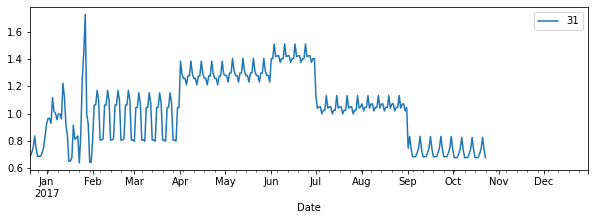

In [33]:
temp_df = pd.read_csv("final_dataset.csv")
data_cringe = temp_df.loc[temp_df['Violation Precinct'] == 12]
# data_cringe = data_cringe.loc[data_cringe['year'] < 2017]
# data_cringe = data_cringe.loc[data_cringe['year'] >= 2016]
data_cringe = data_cringe.set_index('Issue Date') 



# ax = data_cringe.plot(y = "count")
new_df = final_df.plot(y = 31, figsize=(10,3))

In [35]:
final_df.to_csv("gradient.csv")